# Uber-Aata-Analysis-apr14



# This project Introduces the core concepts around alternative data, the most recent research in this area, as well as practical portfolio examples and actual applications & I'm aiming at carreers prospects as a data scientist in financial markets also looking to enhance my analytics skillsets to the financial markets. 

# Let's begin by downloading the data, and listing the files within the dataset.

# Data Preparation and Cleaning

In [1]:
#import Libraries
%pylab inline
import pandas as pd
import seaborn


Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset = pd.read_csv(r"C:\Users\VK SOLUTION\Desktop\uber-raw-data-apr14.csv")
data = dataset.copy()
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
# df = pd.read_csv(r"C:\Users\VK SOLUTION\Desktop\uber-raw-data-apr14.csv")
# df.head()
                 

In [4]:
#Convert datetime and add some useful columns

data['Date/Time']= data['Date/Time'].map(pd.to_datetime)

In [5]:
#Get Day of the Month

def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [6]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [7]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()


,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


In [8]:
#Analysis:
# - Analyze the Day of Month(DOM)

Text(0.5, 1.0, 'Frequency by Day of the Month - Uber - April 2014')

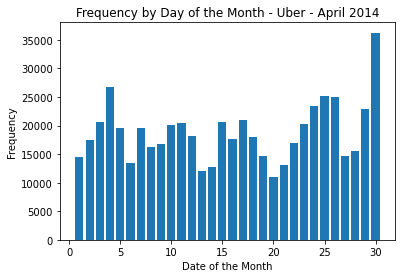

In [9]:
hist(data.dom, bins=30, rwidth=0.8, range=(0.5, 30.5))
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency by Day of the Month - Uber - April 2014')

In [10]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

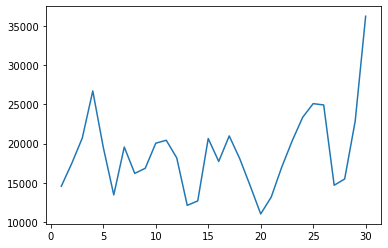

In [11]:
plot(by_date)

#bar(range(1, 31), by_date)

In [12]:
#Sorting Day of the month data by values rather than date
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

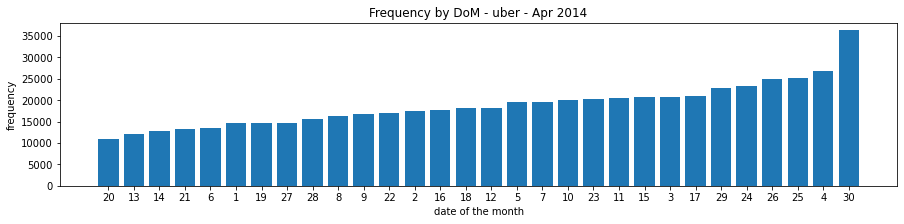

In [13]:
plt.figure(figsize=(15, 3))
plt.bar(range(1, 31), by_date_sorted)
xticks(range(1, 31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')
;
# ";" is used to remove the matplotlib outputs

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

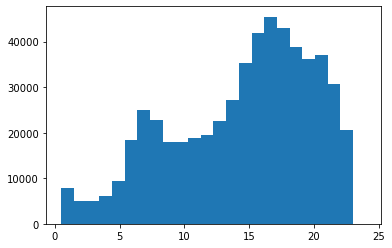

In [14]:
#Now lets Analyze the hours

hist(data.hour,bins=24, range=(.5, 24))

([<matplotlib.axis.XTick at 0xbd6b8b0>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

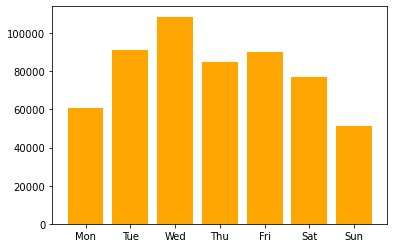

In [15]:
#Now lets Analyze the hours

hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='orange')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

In [16]:
#A Cross Analysis of "hours" and "Day of the week(DoW)"

count_rows(data)
by_hour_weekday = data.groupby('hour weekday'.split()).apply(count_rows).unstack()
by_hour_weekday

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


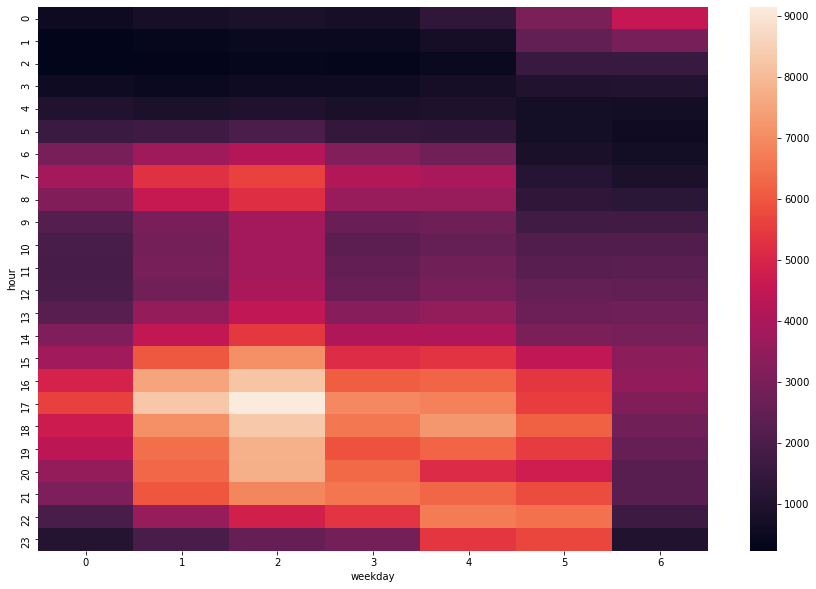

In [17]:
#plot a heat map of our data, the brightest spot shows the day/hour with the highest frequency
plt.figure(figsize=(15, 10))
seaborn.heatmap(by_hour_weekday)

''

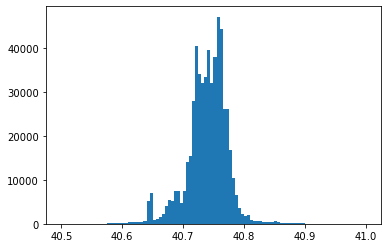

In [18]:
#Analyzing by Latitude and Longitude

hist(data['Lat'], bins=100, range = (40.5, 41))
;

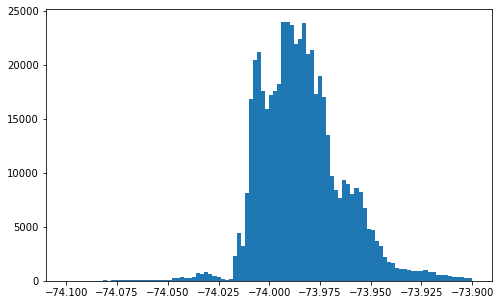

In [19]:
plt.figure(figsize=(8, 5))
hist(data['Lon'], bins=100, range = (-74.1, -73.9));

''

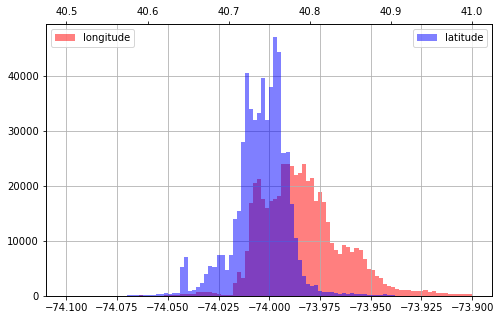

In [20]:
plt.figure(figsize=(8, 5))
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='r', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='b', alpha=.5, label = 'latitude')
legend(loc='best')
;

(40.7, 41.0)

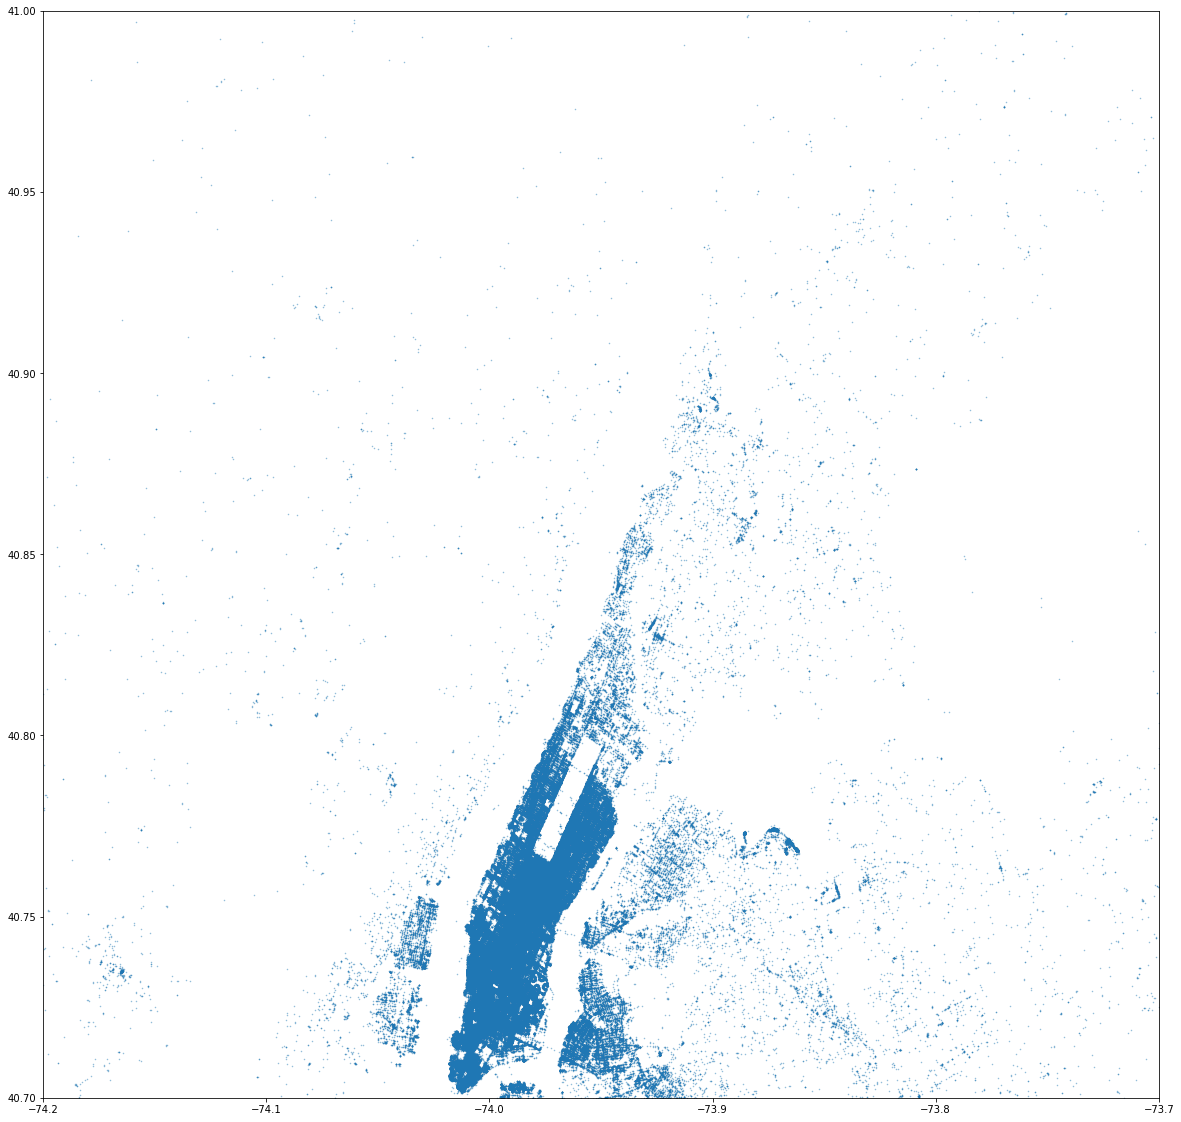

In [21]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)

# Asking and Answering Questions

# Q1: how can we analyze the weekday in this analysis

([<matplotlib.axis.XTick at 0xbe310a0>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

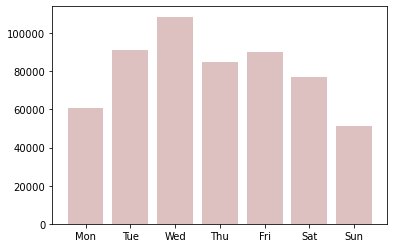

In [23]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

# Q2: In the given time period of the uber datasheet analyse the hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

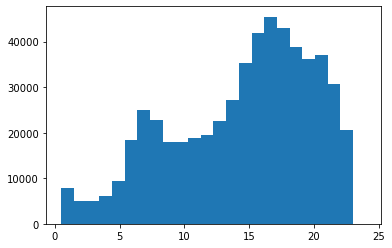

In [24]:
hist(data.hour, bins=24, range=(.5, 24))

# Q3:what will be the cross analysis (hour, dow) of the given project datasheet

In [25]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

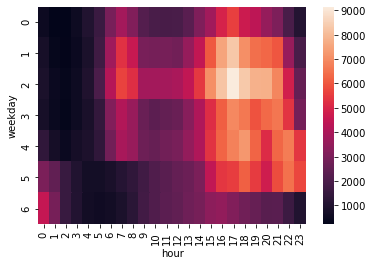

In [26]:
seaborn.heatmap(by_cross)

# Q4: TODO - different and interesting graph plot analysis by lat and lon

''

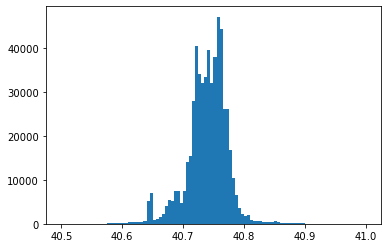

In [30]:
hist(data['Lat'], bins=100, range = (40.5, 41))
;

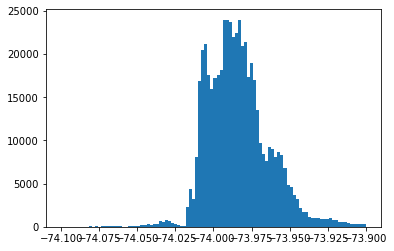

In [31]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9));

# Q5: TODO - some interesting finding through graph plot for the datasheet

''

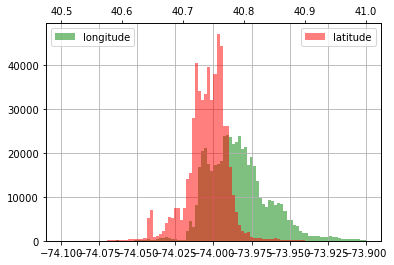

In [33]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;